# **PERCEPTRON**

## **Perceptron Intuition**

In [16]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron

In [17]:
p = Perceptron()
df = pd.read_csv('../datasets/Placement.csv')
df['Percentage'] = df['CGPA']*10            #creating a new column
col= 'Placement'                            # changing the position of columns
df = df[[c for c in df.columns if c!=col] + [col]]
print(df.shape)


(100, 5)


<Axes: xlabel='CGPA', ylabel='IQ'>

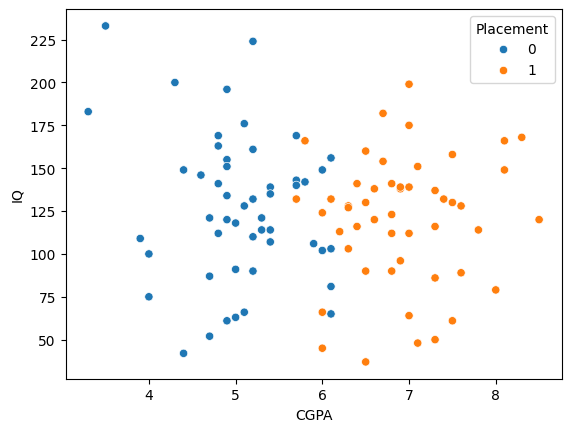

In [18]:
x = df.iloc[:,:4]
y = df.iloc[:,-1]
sns.scatterplot(x=df['CGPA'], y=df['IQ'], hue=df['Placement'])

In [19]:
p.fit(x,y)

Perceptron()

In [20]:
p.coef_

array([[  85. ,   39.6, -230. ,  396. ]])

In [21]:
p.intercept_

array([-41.])

c:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\myenv39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

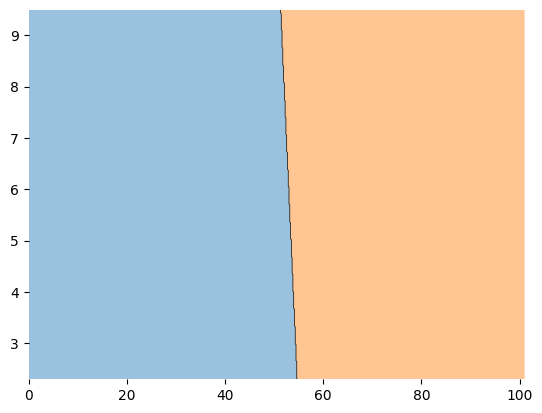

In [22]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(
    df.iloc[:, :4].values,
    y.values,
    clf = p,
    filler_feature_values = {
        2: df.iloc[:,2].mean(),
        3: df.iloc[:,3].mean()
    },
    legend=2
)



## **Perceptron Tricks**

In [23]:
from sklearn.datasets import make_classification
import numpy as np
x, y = make_classification(n_features = 2, n_samples = 100, n_informative = 1, n_redundant = 0, n_clusters_per_class = 1, random_state = 41, n_classes = 2, hypercube = False, class_sep = 10 )

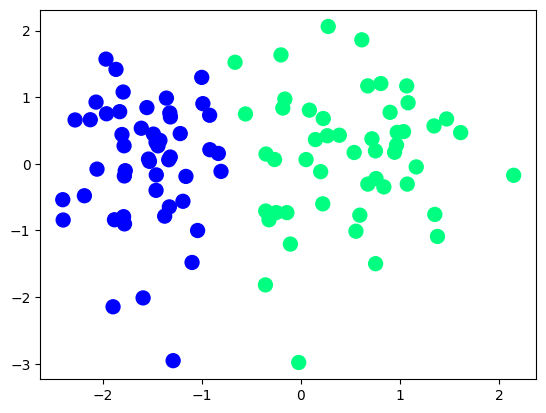

In [24]:
plt.Figure(figsize=(10,5))
plt.scatter(x[:,0], x[:,1], c=y, cmap='winter', s=100)

In [25]:
def Perceptron(x,y):
    x = np.insert(x,0,1, axis=1)
    weights = np.ones(x.shape[1])
    n = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(weights, x[j]))
        weights = weights + n*(y[j]-y_hat)*x[j]
    return weights[0], weights[1:]

def step(z):
    return 1 if z>0 else 0

In [26]:
intercept_, coef_ = Perceptron(x,y)
print(intercept_)
print(coef_)

0.9
[1.36624593 0.13533639]


In [30]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
b

np.float64(-6.650096099227722)

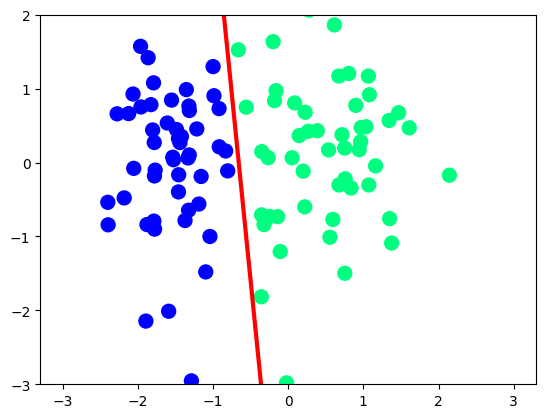

In [28]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.Figure(figsize=(10,6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.scatter(x[:,0], x[:,1], c = y, cmap='winter', s=100)
plt.ylim(-3,2)
plt.show()

In [29]:

# applying gradient descent # efficient way

def perceptron(x,y):
    w1 = w2 = b = 1
    n = 0.1
    
    for j in range(1000):
        for i in range(x.shape[0]):
            z = w1[i]*x[i][0] + w2[i]*x[i][1] + b
            
            if y[i]*z<0:
                w1 = w1+n*y[i]*x[i][0]
                w2 = w2+n*y[i]*x[i][1]
                b = b + n*y[i]
                
    return w1,w2,b
